In [1]:
from pyscf import gto, scf, dft, cc
import numpy as np
import pandas as pd
import pyscf
import matplotlib.pyplot as plt
import basis_set_exchange as bse
from FcMole import *
import os
import ast
from IPython.display import display

%load_ext autoreload
%autoreload 2
from AP_class import APDFT_perturbator as AP

## Load Dataset ##

In [2]:
data = np.load('Benzene_BNdoping_CCSD_ccpvdz.npz', allow_pickle=True)
charges, coords, elements, energies = data['charges'], data['coords'], data['elements'], data['energies']

In [3]:
columns = ['Charges', 'Elements', 'Energy']
benzene_data = pd.DataFrame(columns=columns)

# print(benzene_data)
benzene_data['Charges'] = charges.tolist()
benzene_data['Elements'] = elements.tolist()
benzene_data['Energy'] = energies.tolist()
display(benzene_data)

,Charges,Elements,Energy
0,"[7, 5, 6, 6, 6, 6, 1, 1, 1, 1, 1, 1]","[N, B, C, C, C, C, H, H, H, H, H, H]",-231.630120
1,"[7, 6, 5, 6, 6, 6, 1, 1, 1, 1, 1, 1]","[N, C, B, C, C, C, H, H, H, H, H, H]",-231.560496
2,"[7, 6, 6, 5, 6, 6, 1, 1, 1, 1, 1, 1]","[N, C, C, B, C, C, H, H, H, H, H, H]",-231.565932
3,"[7, 7, 5, 5, 6, 6, 1, 1, 1, 1, 1, 1]","[N, N, B, B, C, C, H, H, H, H, H, H]",-234.786082
4,"[7, 7, 5, 6, 5, 6, 1, 1, 1, 1, 1, 1]","[N, N, B, C, B, C, H, H, H, H, H, H]",-234.827144
5,"[7, 7, 5, 6, 6, 5, 1, 1, 1, 1, 1, 1]","[N, N, B, C, C, B, H, H, H, H, H, H]",-234.914257
6,"[7, 7, 6, 5, 5, 6, 1, 1, 1, 1, 1, 1]","[N, N, C, B, B, C, H, H, H, H, H, H]",-234.702319
7,"[7, 5, 7, 6, 6, 5, 1, 1, 1, 1, 1, 1]","[N, B, N, C, C, B, H, H, H, H, H, H]",-235.010326
8,"[7, 5, 7, 6, 5, 6, 1, 1, 1, 1, 1, 1]","[N, B, N, C, B, C, H, H, H, H, H, H]",-234.943435
9,"[7, 6, 7, 5, 5, 6, 1, 1, 1, 1, 1, 1]","[N, C, N, B, B, C, H, H, H, H, H, H]",-234.813273


## ANM Calculation ##

In [4]:
benz_atom="""
C           -0.697371497090    -1.207738372848     0.000562326671
C            0.697247832957    -1.207809485584     0.000988816276
C            1.394619986458    -0.000071289571     0.000426160659
C            0.697371509370     1.207738369437    -0.000562929832
C           -0.697247835595     1.207809496647    -0.000988454501
C           -1.394619993964     0.000071279378    -0.000425915401
H           -1.243554579312    -2.153645128674     0.001002275318
H            1.243334519449    -2.153771487683     0.001763449199
H            2.486890298093    -0.000126523948     0.000760194696
H            1.243554588771     2.153645133125    -0.001004453155
H           -1.243334534312     2.153771514200    -0.001762175249
H           -2.486890318128     0.000126523234    -0.000759336912
"""

In [5]:
# create molecule
mol_benz=gto.M(atom=benz_atom,basis='cc-pvdz',unit='Angstrom')

hf_benz = scf.RHF(mol_benz)
hf_benz.scf()

ccsd_benz = cc.CCSD(hf_benz)
ccsd_benz.kernel()

total_energy = ccsd_benz.e_tot
print("Total energy:", total_energy)

converged SCF energy = -230.721696179049
E(CCSD) = -231.5592822901105  E_corr = -0.8375861110617211
Total energy: -231.55928229011047


In [6]:
C_idxs = [0, 1, 2, 3, 4, 5]
benz_ap=AP(hf_benz, sites=C_idxs)
H = benz_ap.build_hessian()
print(H)

[[-1.33768559  0.29404992  0.20427852  0.22439826  0.20427844  0.29404989]
 [ 0.29404992 -1.33768551  0.29404989  0.20427844  0.22439822  0.20427854]
 [ 0.20427852  0.29404989 -1.3376853   0.29404989  0.20427854  0.2243981 ]
 [ 0.22439826  0.20427844  0.29404989 -1.33768559  0.29404992  0.20427852]
 [ 0.20427844  0.22439822  0.20427854  0.29404992 -1.33768552  0.29404989]
 [ 0.29404989  0.20427854  0.2243981   0.20427852  0.29404989 -1.33768531]]


In [7]:
# mf_benz = dft.RKS(mol_benz)
# mf_benz.xc = 'PBE0'
# mf_benz.scf()

# C_idxs = [0, 1, 2, 3, 4, 5]
# benz_ap=AP(mf_benz, sites=C_idxs)
# H = benz_ap.build_hessian()
# print(H)

In [8]:
# compute the diagnalization matrix (of eigenvectors) Q

epsilon, Q = np.linalg.eig(H)
Q_inv = np.linalg.inv(Q)
print(Q)
print(Q_inv)
print(epsilon)

[[ 0.40824827 -0.40824865  0.55369237 -0.16357814  0.47605139 -0.32666255]
 [ 0.40824828  0.40824844  0.41850954  0.39772224  0.04487241  0.57560386]
 [ 0.40824832 -0.40824778 -0.13518333  0.56130136 -0.52092373 -0.24894131]
 [ 0.40824827  0.40824865 -0.55369237  0.16357812  0.4760514  -0.32666254]
 [ 0.40824828 -0.40824845 -0.41850953 -0.39772224  0.0448724   0.57560387]
 [ 0.40824832  0.40824779  0.13518332 -0.56130136 -0.52092374 -0.2489413 ]]
[[ 0.40824827  0.40824828  0.40824832  0.40824827  0.40824828  0.40824832]
 [-0.40824865  0.40824844 -0.40824778  0.40824865 -0.40824845  0.40824779]
 [ 0.55369237  0.41850954 -0.13518333 -0.55369237 -0.41850953  0.13518332]
 [-0.16357814  0.39772224  0.56130136  0.16357812 -0.39772224 -0.56130136]
 [ 0.47605139  0.04487241 -0.52092373  0.4760514   0.0448724  -0.52092374]
 [-0.32666256  0.57560386 -0.24894131 -0.32666254  0.57560387 -0.24894129]]
[-0.11663048 -1.74162646 -1.47231232 -1.47231221 -1.61161568 -1.61161567]


## Prepare Training Data ##

In [9]:
# Compute the dx value as the different between target charge and reference charge
ref_charge = [6, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1, 1]
ref_charge_array = np.tile(ref_charge, (17, 1))
target_charge_array = np.array(benzene_data['Charges'].tolist())
dx_array = (target_charge_array - ref_charge_array)[:, :6]

# Compute the c array, which represents the ANM coordinates
c_array = (Q @ dx_array.T).T
print(c_array.shape)

# Append the data onto the dataframe
benzene_data['dx'] = dx_array.tolist()
benzene_data['c'] = c_array.tolist()
for i in range(len(c_array[0])):
    benzene_data[f"coord{i}"] = benzene_data['c'].apply(lambda x: x[i])

display(benzene_data)

(17, 6)


,Charges,Elements,Energy,dx,dc,c,coord0,coord1,coord2,coord3,coord4,coord5
0,"[7, 5, 6, 6, 6, 6, 1, 1, 1, 1, 1, 1]","[N, B, C, C, C, C, H, H, H, H, H, H]",-231.630120,"[1, -1, 0, 0, 0, 0]",None,"[0.816496913350489, -1.5417722531996247e-07, 0...",0.816497,-1.541772e-07,0.816496,-3.811178e-07,0.816497,5.353068e-07
1,"[7, 6, 5, 6, 6, 6, 1, 1, 1, 1, 1, 1]","[N, C, B, C, C, C, H, H, H, H, H, H]",-231.560496,"[1, 0, -1, 0, 0, 0]",None,"[-0.14544409859349355, -0.010261255379848178, ...",-0.145444,-1.026126e-02,0.543432,9.619406e-01,0.826758,2.730650e-01
2,"[7, 6, 6, 5, 6, 6, 1, 1, 1, 1, 1, 1]","[N, C, C, B, C, C, H, H, H, H, H, H]",-231.565932,"[1, 0, 0, -1, 0, 0]",None,"[0.5718264064689011, 0.010526040304984496, -0....",0.571826,1.052604e-02,-0.153053,2.446701e-01,0.805971,9.695497e-01
3,"[7, 7, 5, 5, 6, 6, 1, 1, 1, 1, 1, 1]","[N, N, B, B, C, C, H, H, H, H, H, H]",-234.786082,"[1, 1, -1, -1, 0, 0]",None,"[-0.39011460547508137, 0.00026493910236163876,...",-0.390115,2.649391e-04,-0.426117,1.206611e+00,0.816232,1.242614e+00
4,"[7, 7, 5, 6, 5, 6, 1, 1, 1, 1, 1, 1]","[N, N, B, C, B, C, H, H, H, H, H, H]",-234.827144,"[1, 1, -1, 0, -1, 0]",None,"[-1.0297441331826824, 0.3531147729986032, 0.65...",-1.029744,3.531148e-01,0.656108,8.941379e-01,0.373637,1.202237e+00
5,"[7, 7, 5, 6, 6, 5, 1, 1, 1, 1, 1, 1]","[N, N, B, C, C, B, H, H, H, H, H, H]",-234.914257,"[1, 1, -1, 0, 0, -1]",None,"[-0.22703018985171114, -0.17761668000889075, 0...",-0.227030,-1.776167e-01,0.384125,1.696852e+00,-0.157095,9.302541e-01
6,"[7, 7, 6, 5, 5, 6, 1, 1, 1, 1, 1, 1]","[N, N, C, B, B, C, H, H, H, H, H, H]",-234.702319,"[1, 1, 0, -1, -1, 0]",None,"[-0.31247362812028767, 0.3739020686834359, -0....",-0.312474,3.739021e-01,-0.040377,1.768674e-01,0.352850,1.898721e+00
7,"[7, 5, 7, 6, 6, 5, 1, 1, 1, 1, 1, 1]","[N, B, N, C, C, B, H, H, H, H, H, H]",-235.010326,"[1, -1, 1, 0, 0, -1]",None,"[1.696851834036254, -0.15709447760364503, 0.93...",1.696852,-1.570945e-01,0.930254,-2.270302e-01,-0.177617,3.841252e-01
8,"[7, 5, 7, 6, 5, 6, 1, 1, 1, 1, 1, 1]","[N, B, N, C, B, C, H, H, H, H, H, H]",-234.943435,"[1, -1, 1, 0, -1, 0]",None,"[0.8941378907052827, 0.37363697540384894, 1.20...",0.894138,3.736370e-01,1.202236,-1.029744e+00,0.353115,6.561076e-01
9,"[7, 6, 7, 5, 5, 6, 1, 1, 1, 1, 1, 1]","[N, C, N, B, B, C, H, H, H, H, H, H]",-234.813273,"[1, 0, 1, -1, -1, 0]",None,"[0.649467383823695, 0.3841631698860587, 0.2326...",0.649467,3.841632e-01,0.232687,-7.850736e-01,0.342589,1.625657e+00


## Kernel Ridgde Regression ##

In [10]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error

In [11]:
columns = [f"coord{i}" for i in range(6)]
X = benzene_data[columns].multiply(10)
y = benzene_data['Energy']


In [12]:
display(X)

,coord0,coord1,coord2,coord3,coord4,coord5
0,8.164969,-0.000002,8.164961,-0.000004,8.164967,0.000005
1,-1.454441,-0.102613,5.434317,9.619406,8.267578,2.730650
2,5.718264,0.105260,-1.530530,2.446701,8.059705,9.695497
3,-3.901146,0.002649,-4.261175,12.066112,8.162316,12.426141
4,-10.297441,3.531148,6.561076,8.941379,3.736370,12.022365
5,-2.270302,-1.776167,3.841252,16.968518,-1.570945,9.302541
6,-3.124736,3.739021,-0.403771,1.768674,3.528497,18.987212
7,16.968518,-1.570945,9.302541,-2.270302,-1.776167,3.841252
8,8.941379,3.736370,12.022365,-10.297442,3.531148,6.561076
9,6.494674,3.841632,2.326874,-7.850736,3.425886,16.256567


In [13]:
poly_KRR = KernelRidge(kernel='polynomial', degree=1, alpha = 0.001)

k_fold = KFold(n_splits=5, shuffle=True, random_state=10)
mse_scores = cross_val_score(poly_KRR, X, y, scoring='neg_mean_squared_error', cv=k_fold)
mse_scores = -mse_scores  # Convert negative MSE scores to positive

# Calculate the average error across all folds
avg_mse = mse_scores.mean()

# Print the mean squared error for each fold
for fold, mse in enumerate(mse_scores):
    print(f"Fold {fold+1}: MSE = {mse}")

# Print the average mean squared error
print(f"Average MSE across all folds: {avg_mse}")

Fold 1: MSE = 1.66002869601883
Fold 2: MSE = 4.524819793791965
Fold 3: MSE = 13.56509175006534
Fold 4: MSE = 2.2579897121076304
Fold 5: MSE = 0.8556717262351773
Average MSE across all folds: 4.572720335643789


In [14]:
gaussian_KRR = KernelRidge(kernel='rbf', gamma=0.5, alpha = 0.5)

k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
mse_scores = cross_val_score(gaussian_KRR, X, y, scoring='neg_mean_squared_error', cv=k_fold)
mse_scores = -mse_scores  # Convert negative MSE scores to positive

# Calculate the average error across all folds
avg_mse = mse_scores.mean()

# Print the mean squared error for each fold
for fold, mse in enumerate(mse_scores):
    print(f"Fold {fold+1}: MSE = {mse}")

# Print the average mean squared error
print(f"Average MSE across all folds: {avg_mse}")

Fold 1: MSE = 54804.55965142985
Fold 2: MSE = 55558.08738135649
Fold 3: MSE = 55205.804376614135
Fold 4: MSE = 55187.724471533205
Fold 5: MSE = 55129.30005017627
Average MSE across all folds: 55177.095186221995


## Hyperparameter Tuning ##

In [15]:
# # Hyperparam tuning
# # Grid search round 1

# param_grid = {
#     'alpha': [0.0001, 0.0002, 0.0005, 0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1],
#     'kernel': ['poly'],  
#     'degree': [1, 2, 3, 4, 5, 6], 
#     'coef0': [0.0, 0.5, 1.0, 2.0], 
# }

# poly_KRR = KernelRidge()

# k_fold = KFold(n_splits=5, shuffle=True, random_state=10)
# grid_search = GridSearchCV(poly_KRR, param_grid, scoring='neg_mean_squared_error', cv=k_fold)
# grid_search.fit(X, y)

# best_params = grid_search.best_params_
# best_score = -grid_search.best_score_

# # Print the best hyperparameters and score
# print("Best Hyperparameters:", best_params)
# print("Best Mean Squared Error:", best_score)

In [16]:
# # Grid Search Round 2

# param_grid = {
#     'alpha': np.linspace(0.005, 0.015, num=10),
#     'kernel': ['poly'],  
#     'degree': [1, 2, 3], 
#     'coef0': np.linspace(1.5, 2.5, num=10), 
# }

# poly_KRR = KernelRidge()

# k_fold = KFold(n_splits=5, shuffle=True, random_state=10)
# grid_search = GridSearchCV(poly_KRR, param_grid, scoring='neg_mean_squared_error', cv=k_fold)
# grid_search.fit(X, y)

# best_params = grid_search.best_params_
# best_score = -grid_search.best_score_

# # Print the best hyperparameters and score
# print("Best Hyperparameters:", best_params)
# print("Best Mean Squared Error:", best_score)

In [17]:
# # Grid Search Round 3

# param_grid = {
#     'alpha': np.linspace(0.015, 0.02, num=10),
#     'kernel': ['poly'],  
#     'degree': [1, 2, 3], 
#     'coef0': np.linspace(2, 2.5, num=10), 
# }

# poly_KRR = KernelRidge()

# k_fold = KFold(n_splits=5, shuffle=True, random_state=10)
# grid_search = GridSearchCV(poly_KRR, param_grid, scoring='neg_mean_squared_error', cv=k_fold)
# grid_search.fit(X, y)

# best_params = grid_search.best_params_
# best_score = -grid_search.best_score_

# # Print the best hyperparameters and score
# print("Best Hyperparameters:", best_params)
# print("Best Mean Squared Error:", best_score)

## Learning Curve ##

In [18]:
def evaluate_performance(model, X, y, num_training_sample, num_trials):

    """ 
    Given the number of training samples used, 
    calculate the average and standard deviation of MSE across a certain number of trials.
    For each trial, a specified number of training examples is used to train the model, 
    which is then evaluated on the rest of the data set.

    Args:
        X (ndarray): training data; size (N, m) where N is the number of training examples and m is the number of features
        y (ndarray): target data; size (N, 1)
        num_training_sample (int): the number of samples used for training
        num_trials: the number of trials 
    
    Returns:
        average_error: the average MSE across all trials
        std_dev_error: standard deviation of the error across all trials
    """

    errors = []
    test_size = 1.0 - num_training_sample/X.shape[0]

    for i in range(num_trials):
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=test_size, shuffle=True, random_state=i)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        error = np.sqrt(mean_squared_error(y_val, y_pred)) # Root mean squared error
        errors.append(error)
    
    average_error = np.mean(errors)
    std_dev_error = np.std(errors)
    return average_error, std_dev_error

In [19]:
best_params = {'alpha': 0.0156, 'coef0': 2.44, 'degree': 1, 'kernel': 'poly'}
poly_KRR = KernelRidge(**best_params)

columns = ['training size', 'average RMSE', 'standard deviation']
model_performance = pd.DataFrame(columns=columns)

training_size = [i for i in range(1, 17)]
num_trials = 20

for num_training_sample in training_size:
    index = num_training_sample - 1
    average_error, std_dev_error = evaluate_performance(poly_KRR, X, y, num_training_sample, num_trials)
    model_performance.at[index, 'training size'] = num_training_sample
    model_performance.at[index, 'average RMSE'] = average_error
    model_performance.at[index, 'standard deviation'] = std_dev_error
    print(f"Training size: {num_training_sample}. Average RMSE: {average_error}")

Training size: 1. Average RMSE: 201.12169081170273
Training size: 2. Average RMSE: 183.20161004442292
Training size: 3. Average RMSE: 174.86592512761524
Training size: 4. Average RMSE: 160.72005106749688
Training size: 5. Average RMSE: 153.07768402908624
Training size: 6. Average RMSE: 112.96422926972214
Training size: 7. Average RMSE: 89.8652370940761
Training size: 8. Average RMSE: 84.68312695770234
Training size: 9. Average RMSE: 23.30039931867322
Training size: 10. Average RMSE: 24.313006967663423
Training size: 11. Average RMSE: 26.093780988511742
Training size: 12. Average RMSE: 28.41886107182388
Training size: 13. Average RMSE: 28.41886107182388
Training size: 14. Average RMSE: 31.56773055271366
Training size: 15. Average RMSE: 36.05910618663141
Training size: 16. Average RMSE: 43.59934717426905


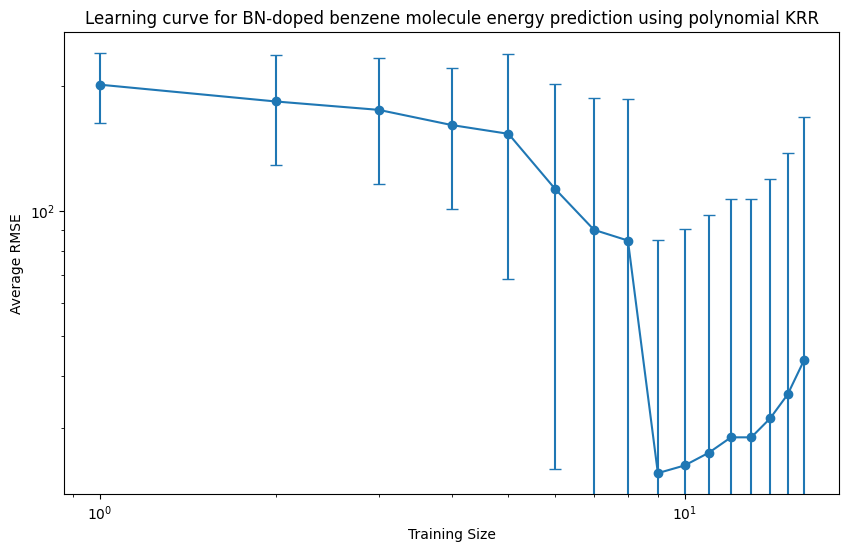

In [22]:
graph_x = model_performance['training size']
graph_y = model_performance['average RMSE']
graph_error = model_performance['standard deviation']

# Set figure size
plt.figure(figsize=(10, 6))

# Create line plot with error bars
plt.errorbar(graph_x, graph_y, yerr=graph_error, marker='o', linestyle='-', capsize=4)

# Set axis labels and title
plt.xlabel('Training Size')
plt.ylabel('Average RMSE')
plt.title('Learning curve for BN-doped benzene molecule energy prediction using polynomial KRR')

plt.xscale('log')
plt.yscale('log')


# Save the figure as a PNG image
plt.savefig('[Benz] learning_curve_16_points.png', dpi=300)
plt.show()

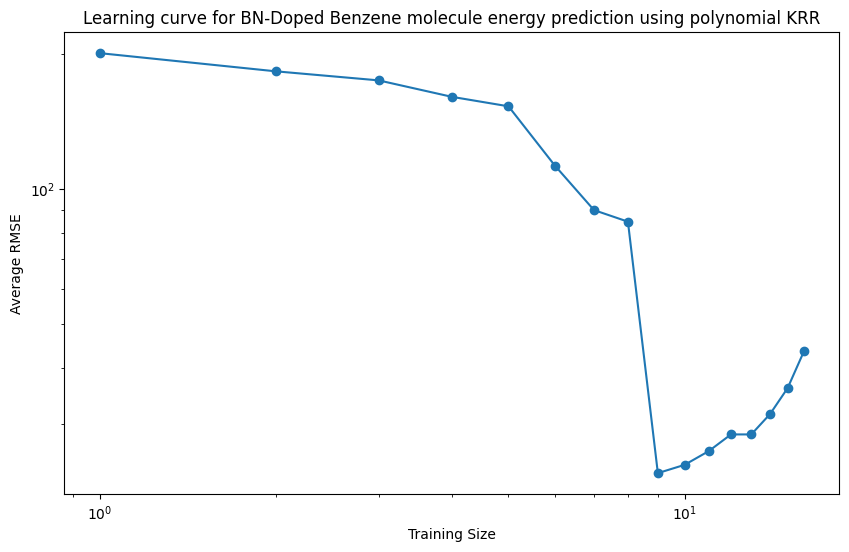

In [23]:
# a version without error bar

plt.figure(figsize=(10, 6))

plt.plot(graph_x, graph_y, marker='o', linestyle='-')

plt.xlabel('Training Size')
plt.ylabel('Average RMSE')
plt.title('Learning curve for BN-Doped Benzene molecule energy prediction using polynomial KRR')

plt.xscale('log')
plt.yscale('log')


# Save the figure as a PNG image
plt.savefig('[Benz] learning_curve_16_points_no_err_bar.png', dpi=300)
plt.show()